In [116]:
# fbprophet 라이브러리 설치 
# pip install pystan
# pip install fbprophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import fbprophet
from fbprophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df_raw = pd.read_csv("final_total3.csv")
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2792 non-null   datetime64[ns]
 1   Price             2792 non-null   int64         
 2   Open              2792 non-null   int64         
 3   High              2792 non-null   int64         
 4   Low               2792 non-null   int64         
 5   Change %          2792 non-null   float64       
 6   Y2_Price          2792 non-null   float64       
 7   Y2_Open           2792 non-null   float64       
 8   Y2_High           2792 non-null   float64       
 9   Y2_Low            2792 non-null   float64       
 10  Y2_Change         2792 non-null   float64       
 11  Y10_Price         2792 non-null   float64       
 12  Y10_Open          2792 non-null   float64       
 13  Y10_High          2792 non-null   float64       
 14  Y10_Low           2792 n

In [2]:
df0_raw = df_raw

In [3]:
df0_raw=df0_raw.iloc[:,:]
df0_raw

,Date,Price,Open,High,Low,Change %,Y2_Price,Y2_Open,Y2_High,Y2_Low,...,NAV,Dollor_Price,Dollor_Open,Dollor_High,Dollor_Low,Dollor_Change %,Current_Price,Current_Change %,Stock,STS_price
0,2011-01-04,25120,25120,25120,25120,0.0164,0.6210,0.621,0.621,0.621,...,31.64,79.44,79.09,79.51,78.89,0.39,25175.0,0.86,136890.0,100.70
1,2011-01-05,24720,24720,24720,24720,-0.0159,0.7080,0.708,0.708,0.708,...,31.91,80.26,79.40,80.35,79.34,1.03,24650.0,-2.09,136860.0,100.70
2,2011-01-06,24534,24534,24534,24534,-0.0075,0.6770,0.677,0.677,0.677,...,31.57,80.79,80.19,80.94,80.15,0.66,24875.0,0.91,137040.0,100.70
3,2011-01-07,24180,24180,24180,24180,-0.0144,0.5970,0.597,0.597,0.597,...,31.65,81.01,80.87,81.14,80.69,0.27,24345.0,-2.13,136896.0,100.70
4,2011-01-10,23847,23847,23847,23847,-0.0138,0.5730,0.573,0.573,0.573,...,31.88,80.88,81.16,81.31,80.81,-0.16,24050.0,-1.21,136806.0,100.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2022-03-04,28919,28600,28650,28600,0.0752,1.4899,1.552,1.554,1.412,...,21.85,98.65,98.04,98.92,97.84,0.88,29800.0,3.47,77082.0,185.47
2788,2022-03-07,48078,42200,42100,42200,0.6625,1.5563,1.426,1.564,1.422,...,22.18,99.29,98.51,99.42,98.51,0.65,42995.0,44.28,76830.0,185.47
2789,2022-03-08,81052,81067,86792,81032,0.6858,1.6008,1.554,1.641,1.552,...,22.25,99.06,99.24,99.32,98.71,-0.23,42995.0,0.00,75012.0,185.47
2790,2022-03-09,48048,50272,50272,50272,-0.4072,1.6757,1.615,1.688,1.593,...,21.84,97.97,99.12,99.12,97.85,-1.10,42995.0,0.00,74778.0,185.47


In [4]:
df0=pd.DataFrame()
df0['Date']=df0_raw['Date']
factor_list=list(df0_raw.iloc[:,1:].columns.values)
for i in factor_list:
    df0[i]=pd.to_numeric(df0_raw[i]).astype(float)
df0

,Date,Price,Open,High,Low,Change %,Y2_Price,Y2_Open,Y2_High,Y2_Low,...,NAV,Dollor_Price,Dollor_Open,Dollor_High,Dollor_Low,Dollor_Change %,Current_Price,Current_Change %,Stock,STS_price
0,2011-01-04,25120.0,25120.0,25120.0,25120.0,0.0164,0.6210,0.621,0.621,0.621,...,31.64,79.44,79.09,79.51,78.89,0.39,25175.0,0.86,136890.0,100.70
1,2011-01-05,24720.0,24720.0,24720.0,24720.0,-0.0159,0.7080,0.708,0.708,0.708,...,31.91,80.26,79.40,80.35,79.34,1.03,24650.0,-2.09,136860.0,100.70
2,2011-01-06,24534.0,24534.0,24534.0,24534.0,-0.0075,0.6770,0.677,0.677,0.677,...,31.57,80.79,80.19,80.94,80.15,0.66,24875.0,0.91,137040.0,100.70
3,2011-01-07,24180.0,24180.0,24180.0,24180.0,-0.0144,0.5970,0.597,0.597,0.597,...,31.65,81.01,80.87,81.14,80.69,0.27,24345.0,-2.13,136896.0,100.70
4,2011-01-10,23847.0,23847.0,23847.0,23847.0,-0.0138,0.5730,0.573,0.573,0.573,...,31.88,80.88,81.16,81.31,80.81,-0.16,24050.0,-1.21,136806.0,100.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,2022-03-04,28919.0,28600.0,28650.0,28600.0,0.0752,1.4899,1.552,1.554,1.412,...,21.85,98.65,98.04,98.92,97.84,0.88,29800.0,3.47,77082.0,185.47
2788,2022-03-07,48078.0,42200.0,42100.0,42200.0,0.6625,1.5563,1.426,1.564,1.422,...,22.18,99.29,98.51,99.42,98.51,0.65,42995.0,44.28,76830.0,185.47
2789,2022-03-08,81052.0,81067.0,86792.0,81032.0,0.6858,1.6008,1.554,1.641,1.552,...,22.25,99.06,99.24,99.32,98.71,-0.23,42995.0,0.00,75012.0,185.47
2790,2022-03-09,48048.0,50272.0,50272.0,50272.0,-0.4072,1.6757,1.615,1.688,1.593,...,21.84,97.97,99.12,99.12,97.85,-1.10,42995.0,0.00,74778.0,185.47


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2792 non-null   datetime64[ns]
 1   Price             2792 non-null   float64       
 2   Open              2792 non-null   float64       
 3   High              2792 non-null   float64       
 4   Low               2792 non-null   float64       
 5   Change %          2792 non-null   float64       
 6   Y2_Price          2792 non-null   float64       
 7   Y2_Open           2792 non-null   float64       
 8   Y2_High           2792 non-null   float64       
 9   Y2_Low            2792 non-null   float64       
 10  Y2_Change         2792 non-null   float64       
 11  Y10_Price         2792 non-null   float64       
 12  Y10_Open          2792 non-null   float64       
 13  Y10_High          2792 non-null   float64       
 14  Y10_Low           2792 n

In [6]:
# 데이터 팩터화를 통해 나중에 날짜 데이터와 합칠때 유용하게 쓰일 함수

'''factor_list=list(df0.iloc[:,1:].columns.values)

my_factor='Price'

# <<선물가>>
my_case=pd.DataFrame()
my_case['Date']=df0['Date']

# 데이터 선택. 나중에 다른 원자재까지 통합할때 유용할 듯
for c in factor_list:
    if my_factor in c:
        my_case[c]=df0[c]
my_case'''

"factor_list=list(df0.iloc[:,1:].columns.values)\n\nmy_factor='Price'\n\n# <<선물가>>\nmy_case=pd.DataFrame()\nmy_case['Date']=df0['Date']\n\n# 데이터 선택. 나중에 다른 원자재까지 통합할때 유용할 듯\nfor c in factor_list:\n    if my_factor in c:\n        my_case[c]=df0[c]\nmy_case"

In [7]:
colsize=df0.columns.size

In [8]:
# df1 = 일별 선물가와 현물가수 
df1=pd.DataFrame()
df1['Date']=df0['Date']
df1['Price']=df0['Price']
df1['Current_Price']=df0['Current_Price']
df1=df1.set_index('Date')
df1

,Price,Current_Price
Date,,
2011-01-04,25120.0,25175.0
2011-01-05,24720.0,24650.0
2011-01-06,24534.0,24875.0
2011-01-07,24180.0,24345.0
2011-01-10,23847.0,24050.0
...,...,...
2022-03-04,28919.0,29800.0
2022-03-07,48078.0,42995.0
2022-03-08,81052.0,42995.0


In [9]:
# df2 = corelation을 통한 유의미한 변수 추출 
df2=pd.DataFrame()
df2 = df0[['WTI_Price','B_Price','heating_Price','Gas_Price','Price_y','NAV','STS_price','TradeValue',
           'UC_Price','Y2_Price','GB_Price','JP_Price','EU_Price','Dollor_Price','Stock','Price']]
df2['Date']=df0['Date']
df2=df2.set_index('Date')
df2

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_2879/3441197628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date']=df0['Date']


,WTI_Price,B_Price,heating_Price,Gas_Price,Price_y,NAV,STS_price,TradeValue,UC_Price,Y2_Price,GB_Price,JP_Price,EU_Price,Dollor_Price,Stock,Price
Date,,,,,,,,,,,,,,,,
2011-01-04,89.38,93.53,2.5065,4.669,4.669,31.64,100.70,155396452.0,6.6070,0.6210,0.6415,82.06,0.7514,79.44,136890.0,25120.0
2011-01-05,90.30,95.50,2.5422,4.473,4.473,31.91,100.70,155396452.0,6.6193,0.7080,0.6448,83.19,0.7603,80.26,136860.0,24720.0
2011-01-06,88.38,94.52,2.5112,4.434,4.434,31.57,100.70,155396452.0,6.6263,0.6770,0.6464,83.31,0.7686,80.79,137040.0,24534.0
2011-01-07,88.03,93.33,2.4863,4.422,4.422,31.65,100.70,155396452.0,6.6282,0.5970,0.6428,83.14,0.7746,81.01,136896.0,24180.0
2011-01-10,89.25,95.70,2.5561,4.399,4.399,31.88,100.70,155396452.0,6.6369,0.5730,0.6421,82.72,0.7723,80.88,136806.0,23847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,115.68,118.11,3.7763,5.016,5.016,21.85,185.47,2300000.0,6.3188,1.4899,0.7559,114.78,0.9151,98.65,77082.0,28919.0
2022-03-07,119.40,123.21,3.9215,4.833,4.833,22.18,185.47,2300000.0,6.3194,1.5563,0.7630,115.29,0.9211,99.29,76830.0,48078.0
2022-03-08,123.70,127.98,4.4373,4.527,4.527,22.25,185.47,2300000.0,6.3178,1.6008,0.7630,115.66,0.9172,99.06,75012.0,81052.0


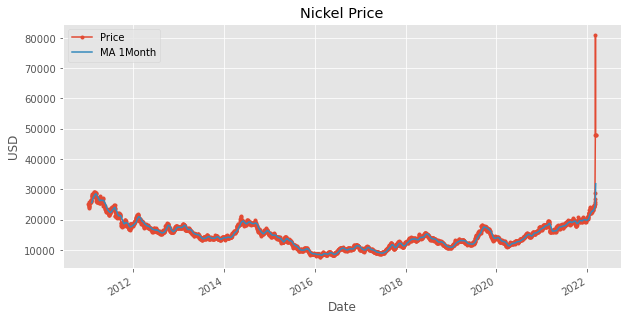

In [10]:
#선물 그래프
df1.Price.plot(title="Nickel Price",
              marker=".",figsize=(10,5),label="Price")
# 1달(18일) 평균선  
df1.Price.rolling(window=18).mean().plot(figsize=(10,5),
                                        label="MA 1Month")
plt.ylabel("USD")
plt.legend()
plt.show()

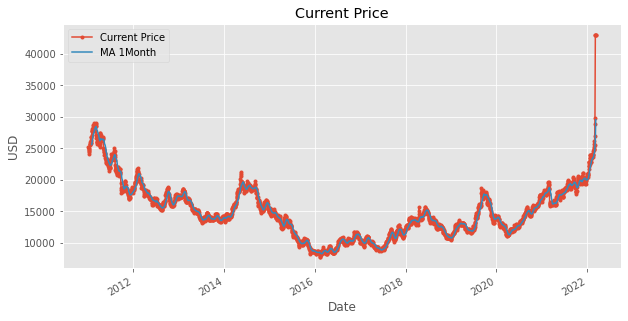

In [11]:
# 현물가 그래프
df1.Current_Price.plot(title="Current Price",
              marker=".",figsize=(10,5),label="Current Price")
# 1달(18일) 평균선  
df1.Current_Price.rolling(window=18).mean().plot(figsize=(10,5),
                                        label="MA 1Month")
plt.ylabel("USD")
plt.legend()
plt.show()

In [12]:
# 선물가 예측 (파라미터 바꾸기 전)
df = df2[['WTI_Price','B_Price','heating_Price','Gas_Price','Price_y','NAV','STS_price','TradeValue',
           'UC_Price','Y2_Price','GB_Price','JP_Price','EU_Price','Dollor_Price','Stock']]
df["ds"] = pd.to_datetime(df2.index)
df["y"]  = df2.iloc[:,-1].values
df

,WTI_Price,B_Price,heating_Price,Gas_Price,Price_y,NAV,STS_price,TradeValue,UC_Price,Y2_Price,GB_Price,JP_Price,EU_Price,Dollor_Price,Stock,ds,y
Date,,,,,,,,,,,,,,,,,
2011-01-04,89.38,93.53,2.5065,4.669,4.669,31.64,100.70,155396452.0,6.6070,0.6210,0.6415,82.06,0.7514,79.44,136890.0,2011-01-04,25120.0
2011-01-05,90.30,95.50,2.5422,4.473,4.473,31.91,100.70,155396452.0,6.6193,0.7080,0.6448,83.19,0.7603,80.26,136860.0,2011-01-05,24720.0
2011-01-06,88.38,94.52,2.5112,4.434,4.434,31.57,100.70,155396452.0,6.6263,0.6770,0.6464,83.31,0.7686,80.79,137040.0,2011-01-06,24534.0
2011-01-07,88.03,93.33,2.4863,4.422,4.422,31.65,100.70,155396452.0,6.6282,0.5970,0.6428,83.14,0.7746,81.01,136896.0,2011-01-07,24180.0
2011-01-10,89.25,95.70,2.5561,4.399,4.399,31.88,100.70,155396452.0,6.6369,0.5730,0.6421,82.72,0.7723,80.88,136806.0,2011-01-10,23847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-04,115.68,118.11,3.7763,5.016,5.016,21.85,185.47,2300000.0,6.3188,1.4899,0.7559,114.78,0.9151,98.65,77082.0,2022-03-04,28919.0
2022-03-07,119.40,123.21,3.9215,4.833,4.833,22.18,185.47,2300000.0,6.3194,1.5563,0.7630,115.29,0.9211,99.29,76830.0,2022-03-07,48078.0
2022-03-08,123.70,127.98,4.4373,4.527,4.527,22.25,185.47,2300000.0,6.3178,1.6008,0.7630,115.66,0.9172,99.06,75012.0,2022-03-08,81052.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -118.167
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8757.43    0.00789962       2135.44      0.2788           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8929.91    0.00365511       1383.09      0.6335      0.6335      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8976.56    0.00536289       863.235      0.1943      0.9436      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9005.61    0.00115131       831.086           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9013.53   0.000397797       249.759           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

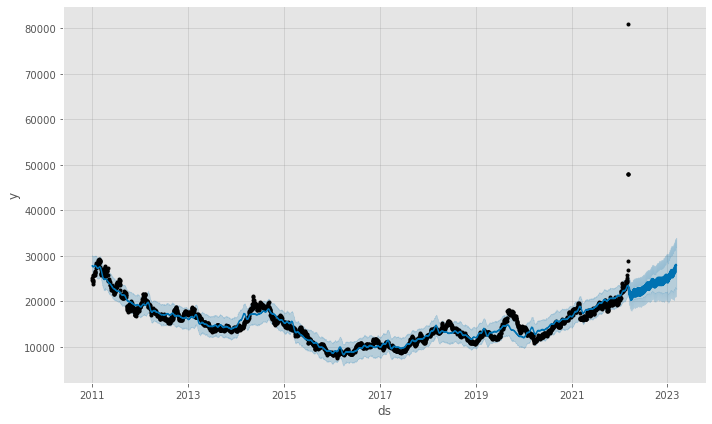

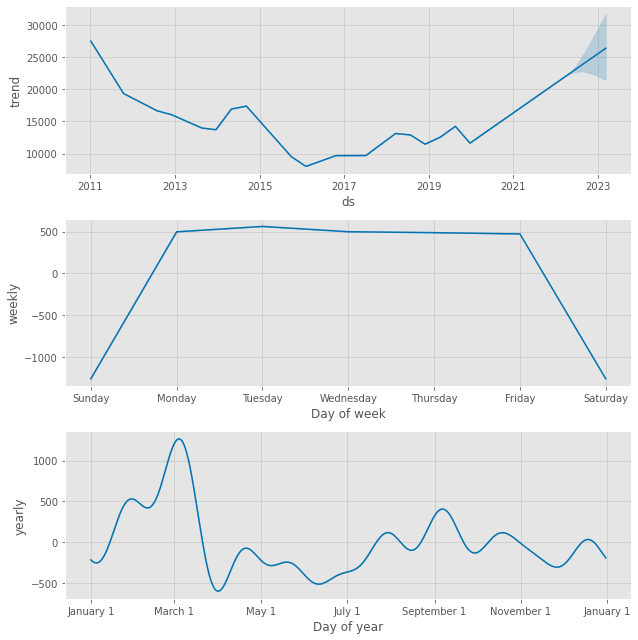

In [13]:
# 모델 생성
model=Prophet()
model.fit(df)
future=model.make_future_dataframe(periods=365) #예측 날짜 = 365일

forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

In [43]:
df_train = (df[['ds', 'y', 'WTI_Price', "B_Price", "STS_price"]].iloc[:1800].copy())
df_predict = df[['ds', 'y', 'WTI_Price', "B_Price", "STS_price"]].copy()

Initial log joint probability = -31.7149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4943.57     0.0149257       2960.81           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5199.68    0.00385743          1146           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5264.87     0.0329784       2848.13           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5301.8    0.00248659       352.604           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5319.84   0.000476662        179.73       2.441      0.2441      551   
    Iter      log prob        ||dx||      ||grad||       alpha  

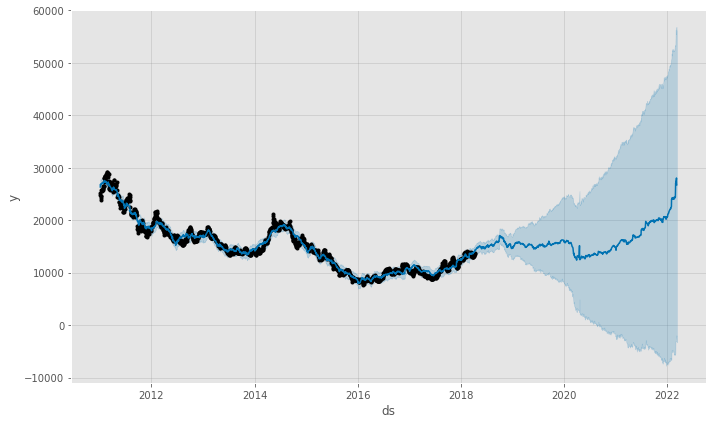

In [44]:
# 파라미터 수정  
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)
# holidays 추가
model=Prophet(yearly_seasonality=12,weekly_seasonality=True,daily_seasonality=False)
model.add_country_holidays(country_name='UK')
model.add_regressor("WTI_Price")
model.add_regressor("B_Price")
model.add_regressor("STS_price")
model.fit(df_train)
forecast3 = model.predict(df_predict)

fig1 = model.plot(forecast3, uncertainty=True)

In [38]:
# 파라미터 수정  
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)
# holidays 추가
model=Prophet(yearly_seasonality=12,weekly_seasonality=True,daily_seasonality=False)
model.add_country_holidays(country_name='UK')
model.add_regressor("WTI_Price")
model.add_regressor("B_Price")
model.add_regressor("STS_price")
model.fit(df)

Initial log joint probability = -118.167


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9085.47    0.00220575       3328.03           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9260.75     0.0039437       5942.01      0.3605           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        9382.2    0.00421582       1499.44           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       9444.33   0.000824274       487.531           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       9465.04    0.00592059       1621.04           1           1      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [42]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

ValueError: Regressor 'WTI_Price' missing from dataframe

Initial log joint probability = -118.167
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8693.17     0.0093639       2192.52      0.5533      0.5533      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8774.21    0.00278141        1441.4      0.7411      0.7411      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8889.56     0.0259273       2318.02           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        8927.8     0.0109185       1174.29       0.718       0.718      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8940.37     0.0426791       1947.28       4.242      0.4242      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

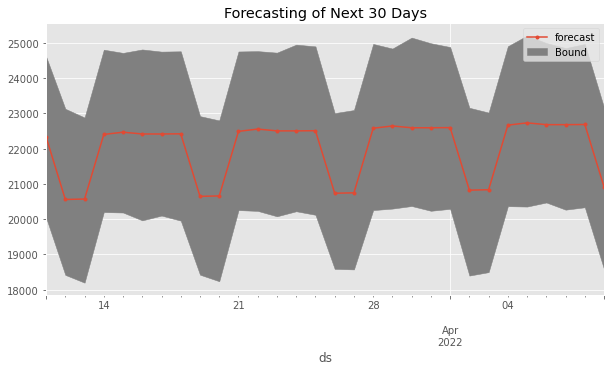

In [15]:
# 캐글 - 예측 그래프(30일)만 보이게 (파라미터 바꾸기 전)
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
        #self.model.add_group_component()
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])
model = Fbprophet()
model.fit(df)
model.forecast(30,"D")
model.R2()

forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]]. \
    tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 30 Days")
plt.show()
# 러시아 우크라이나 전쟁으로인한 급등을 반영하지 못하고 있음

In [16]:
# 아래와 같이 바꿔보았다. +예측도 365일로
# weekly_seasonality=False,daily_seasonality=False,yearly_seasonality=12)
# add_country_holidays(country_name='UK')
class Fbprophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=False,
                             daily_seasonality=False,
                             yearly_seasonality=12)
        self.model.add_country_holidays(country_name='UK')
        self.model.fit(self.data)
          
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

model = Fbprophet()
model.fit(df)
model.forecast(365,"D")
model.R2()
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(365).reset_index().set_index("ds").drop("index",axis=1)

forecast

Initial log joint probability = -118.167
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8764.51       0.01746       1989.96           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8898.97     0.0629554       2845.99           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8974.31    0.00992434       865.721           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8986.09    0.00313522       222.861           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8996.25    0.00641651       761.836           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

,yhat_lower,yhat_upper,yhat
ds,,,
2022-03-11,21324.072645,25602.300660,23513.823759
2022-03-12,21292.630841,25740.655364,23427.589974
2022-03-13,21134.814050,25520.332269,23327.247308
2022-03-14,21020.050281,25495.796349,23215.090293
2022-03-15,20802.527801,25430.723895,23093.733113
...,...,...,...
2023-03-06,23090.170726,33769.576488,28288.874274
2023-03-07,23030.316612,34225.578665,28296.955735
2023-03-08,23054.694078,34233.648663,28286.294320


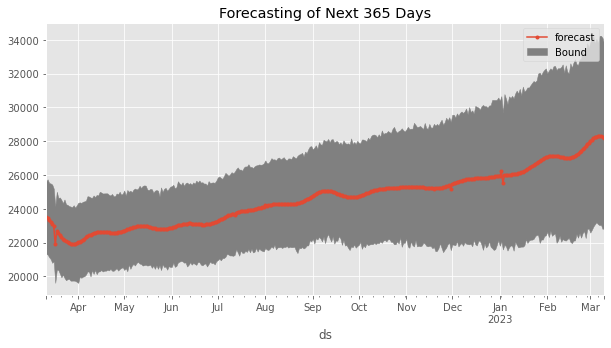

In [17]:
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forecasting of Next 365 Days")
plt.show()

# 영국의 명절을 넣고 일별, 주별은 false, 년별은 12

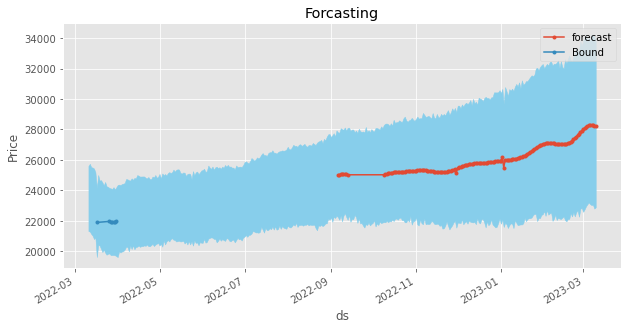

In [18]:
#특정 금액을 넘어가거나 내려오는 시기 예측!
forecast0=(forecast['yhat']>25000)
forecast1=(forecast['yhat']<22000)
forecast[forecast0]["yhat"].plot(marker=".",figsize=(10,5))
forecast[forecast1]["yhat"].plot(marker=".",figsize=(10,5))

plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="skyblue")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forcasting")
plt.ylabel("Price")
plt.show()

In [19]:
forecast[forecast0].iloc[0].name

Timestamp('2022-09-06 00:00:00')

In [20]:
#오류면 안 간다는 의미
forecast[forecast1].iloc[0].name

Timestamp('2022-03-17 00:00:00')

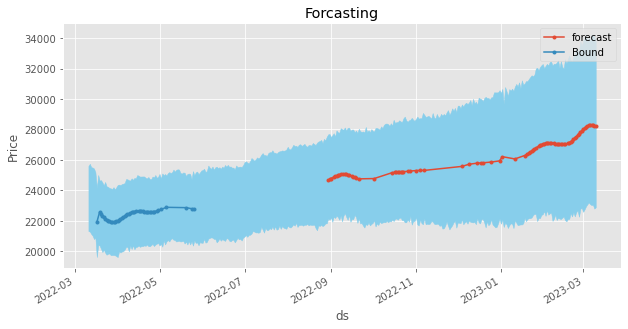

In [21]:
# 예측범위(yhat_upper/yhat_lower)로 설정하면 확실히 넘기는 지점 예측가능할까?

forecast0=(forecast['yhat_lower']>22000)
forecast1=(forecast['yhat_upper']<25000)
forecast[forecast0]["yhat"].plot(marker=".",figsize=(10,5))
forecast[forecast1]["yhat"].plot(marker=".",figsize=(10,5))

plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], 
                 y2=forecast["yhat_upper"],color="skyblue")
plt.legend(["forecast","Bound"],loc="upper right")
plt.title("Forcasting")
plt.ylabel("Price")
plt.show()

In [22]:
forecast[forecast0].iloc[0].name

Timestamp('2022-08-30 00:00:00')

In [23]:
forecast[forecast1].iloc[0].name

Timestamp('2022-03-17 00:00:00')